# Project: Using data from a food products database

---

The objective of this project is to use the data from the database to make analyses, and come up with an application that could use the relevant data from this database.

In this notebook **Data_cleaning**, I am cleaning the data, since the database is relatively big *(320772, 162)* and the data quite dirty (missing data, non-relevant variables, outliers, unusable dtypes, etc.)

I then export the data into a less heavy .csv file, and do the analysis in the notebook **Data_analysis**.

---

## Resources

Database from this website:
https://world.openfoodfacts.org/

Variables describe: https://world.openfoodfacts.org/data/data-fields.txt

---

# Table of contents

[1. Data information](#1)

[2. Cleaning: Quantitative features](#2)

- [*_100g* data](#2.1)
    - [*_100g* - Data information](#2.1.1)
    - [*_100g* - Near-empty columns](#2.1.2)
    - [*_100g* - Outliers (w/o `energy_100g`)](#2.1.3)
    - [*_100g* - Outliers: `energy_100g`](#2.1.4)
    - [*_100g* - Outliers 2](#2.1.5)
    - [*_100g* - NaNs](#2.1.6)

[3. Cleaning: Qualitative features](#3)

- [1) Qualitative features - Data information](#3.1)
- [2) Near-empty columns](#3.2)
- [3) `code`](#3.3)
- [4) NaNs](#3.4)
- [5) Variables](#3.5)
    - [`date_created`](#date_created)
    - [`last_modified`](#last_modified)
    - [`countries_tags`](#countries_tags)
    - [`brands_tags`](#brands_tags)
    - [`states`](#states)
    - [`additives`](#additives)
    - [`ingredients_text`](#ingredients_text)
    - [`nutrition_grade_fr`](#nutrition_grade_fr)
    - [`url`](#url)
    - [`creator`](#creator)
    - [`product_name`](#product_name)
    - [`additives_n`](#additives_n)
    - [`ingredients_from_palm_oil_n`](#ingredients_from_palm_oil_n)
    - [`ingredients_that_may_be_from_palm_oil_n`](#ingredients_that_may_be_from_palm_oil_n)

[4. Data export](#4)

---

**Libraries import**

In [1]:
import numpy as np

import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import seaborn as sns
import matplotlib.pyplot as plt
#from datetime import datetime

**Functions**

In [2]:
def regularize(column):
    """
    Function to regularize a string dtype column.
    input: series
    output: series
    """
    print('Before regularization:', column.nunique())
    regularized_column = column.str.lower()
    #dtype, iso
    #remove les accents
    #strip, lstrip, rstrip
    #peutêtre couper/remove les longues chaînes
    #(((librairy ntlt (enelever les mots communs))))
    print('After regularization:', regularized_column.nunique())
    
    return regularized_column



**Data import**

In [3]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t', low_memory=False)
data_origin = data.copy()

<a name='1'></a>
# 1. Data information

In [4]:
print('Shape of data:', data.shape)
display(data.head(3))

#display(data.describe())
#print(data.nunique())

Shape of data: (320772, 162)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [5]:
#Removing empty lines (0)
data = data.dropna(how='all', axis=0)

#Removing empty columns
data = data.dropna(how='all', axis=1)

print(data.shape)

(320772, 146)


In [6]:
data_info = pd.DataFrame({'Column': data.columns,
                          'Non-Null Count': len(data)-data.isnull().sum(),
                          'n-unique': data.nunique(),
                          'Dtype': data.dtypes})

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_info)

,Column,Non-Null Count,n-unique,Dtype
code,code,320749,320749,object
url,url,320749,320749,object
creator,creator,320770,3535,object
created_t,created_t,320769,189567,object
created_datetime,created_datetime,320763,189568,object
last_modified_t,last_modified_t,320772,180495,object
last_modified_datetime,last_modified_datetime,320772,180495,object
product_name,product_name,303010,221347,object
generic_name,generic_name,52795,38584,object
quantity,quantity,104819,13826,object


In [8]:
data['pnns_groups_1'].isna().mean()

0.7147101367949821

In [9]:
data['pnns_groups_1'].nunique()

14

In [10]:
data['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [11]:
data['pnns_groups_2'].isna().mean()

0.7054262840896337

In [12]:
data['pnns_groups_2'].nunique()

42

In [13]:
data['pnns_groups_2'].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread',
       'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages',
       'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups',
       'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich',
       'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers',
       'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages',
       'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits',
       'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts',
       'Fruit nectars', 'pastries', 'Tripe dishes', 'fruits',
       'Salty and fatty products', 'cereals', 'legumes', 'nuts'],
      dtype=object)

<a name='2'></a>
# 2. Cleaning: Quantitative features

<a name='2.1'></a>
## *_100g* data

Sélection des colonnes

In [14]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
numeric_cols_100g = numeric_cols.copy()
numeric_cols_100g.remove('additives_n')
numeric_cols_100g.remove('ingredients_from_palm_oil_n')
numeric_cols_100g.remove('ingredients_that_may_be_from_palm_oil_n')

In [15]:
data_100g = data[numeric_cols_100g]

display(data_100g)

,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
2,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,1552.0,NaN,1.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,0.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a name='2.1.1'></a>
### *_100g* - Data information

In [16]:
pd.options.mode.chained_assignment = None # default='warn'

data_infos_100g = data_info[data_info['Column'].isin(numeric_cols_100g)]
data_infos_100g['low'] = data[numeric_cols_100g].quantile(0.025)
data_infos_100g['high'] = data[numeric_cols_100g].quantile(0.975)
data_infos_100g['mean'] = data[numeric_cols_100g].mean()

pd.options.mode.chained_assignment = 'warn' # default='warn'

In [17]:
pd.set_option('display.max_rows', None)
display(data_infos_100g)
pd.set_option('display.max_rows', 10)

,Column,Non-Null Count,n-unique,Dtype,low,high,mean
energy_100g,energy_100g,261113,3997,float64,0.000000e+00,2690.000000,1141.914605
energy-from-fat_100g,energy-from-fat_100g,857,335,float64,0.000000e+00,2900.000000,585.501214
fat_100g,fat_100g,243891,3378,float64,0.000000e+00,58.000000,12.730379
saturated-fat_100g,saturated-fat_100g,229554,2197,float64,0.000000e+00,23.000000,5.129932
caprylic-acid_100g,caprylic-acid_100g,1,1,float64,7.400000e+00,7.400000,7.400000
capric-acid_100g,capric-acid_100g,2,2,float64,5.888000e+00,6.192000,6.040000
lauric-acid_100g,lauric-acid_100g,4,4,float64,3.506375e+00,49.277500,36.136182
myristic-acid_100g,myristic-acid_100g,1,1,float64,1.890000e+01,18.900000,18.900000
palmitic-acid_100g,palmitic-acid_100g,1,1,float64,8.100000e+00,8.100000,8.100000
stearic-acid_100g,stearic-acid_100g,1,1,float64,3.000000e+00,3.000000,3.000000


<a name='2.1.2'></a>
### *_100g* - Near-empty columns

In [18]:
print(data.shape)

(320772, 146)


In [19]:
# Keeping only variables with at least 70% of data available
data = data.drop(data_infos_100g[data_infos_100g['Non-Null Count'] < len(data)*0.7]['Column'], axis=1)

In [20]:
with pd.option_context('display.max_columns', None):
    display(data.head(1))

print(data.shape)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(320772, 67)


<a name='2.1.3'></a>
### *_100g* - Outliers (w/o `energy_100g`)

In [21]:
# Removing 'energy_100g' cause scale is different than other _100gs
cols_100g = data.columns[data.columns.isin(numeric_cols_100g)].to_list()
cols_100g_wo_energy = cols_100g.copy()
cols_100g_wo_energy.remove('energy_100g')

<AxesSubplot: >

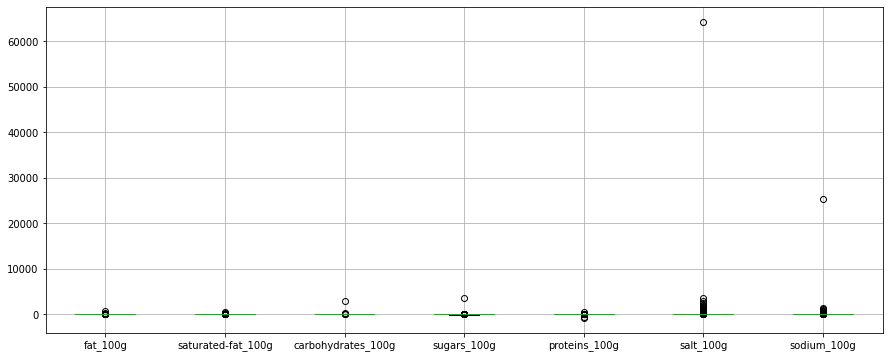

In [22]:
plt.figure(figsize=(15,6))
data.boxplot(column=cols_100g_wo_energy)

In [23]:
# Save NaNs in mask
NaNs_mask = data[cols_100g_wo_energy].copy(deep=True)
NaNs_mask = NaNs_mask.fillna(999999)

In [24]:
display(NaNs_mask.head())

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,999999.00,999999.00,999999.00,999999.00,999999.00,999999.00000,999999.000
1,28.57,28.57,64.29,14.29,3.57,0.00000,0.000
2,17.86,0.00,60.71,17.86,17.86,0.63500,0.250
3,57.14,5.36,17.86,3.57,17.86,1.22428,0.482
4,1.43,999999.00,77.14,999999.00,8.57,999999.00000,999999.000


In [25]:
# Select lines with data < 100
lines_less = NaNs_mask[(NaNs_mask < 0).any(axis=1)].index

# Select lines with data > 100
lines_more = NaNs_mask[((NaNs_mask > 100)
                      & (NaNs_mask != 999999)).any(axis=1)].index

In [26]:
print(lines_less)
print()
print(lines_more)

Int64Index([8582, 18209, 33781, 115310, 117739, 146284, 150858, 164030, 169119,
            195761],
           dtype='int64')

Int64Index([   501,   1435,   3472,   7037,   7983,  11129,  18588,  18845,
             18848,  18851,
            ...
            286482, 287865, 287866, 298059, 303101, 305054, 305114, 313506,
            315621, 317635],
           dtype='int64', length=181)


In [27]:
# Delete lines

print(data.shape)

data = data.drop(lines_less)
data = data.drop(lines_more)

print(data.shape)

(320772, 67)
(320581, 67)


<AxesSubplot: >

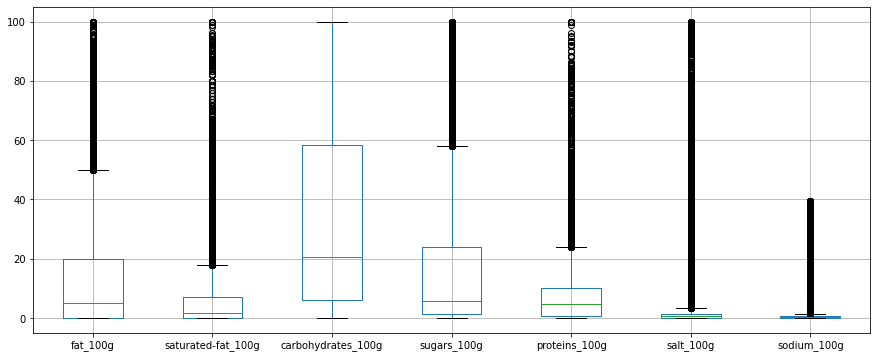

In [28]:
plt.figure(figsize=(15,6))
data.boxplot(column=cols_100g_wo_energy)

<a name='2.1.4'></a>
### *_100g* - Outliers: `energy_100g`

In [29]:
# Save NaNs in mask
NaNs_mask = data['energy_100g'].copy(deep=True)
NaNs_mask = NaNs_mask.fillna(999999)

In [30]:
display(NaNs_mask.head())

0    999999.0
1      2243.0
2      1941.0
3      2540.0
4      1552.0
Name: energy_100g, dtype: float64

In [31]:
# Select lines with 'energy' wrong
lines_energy = NaNs_mask[(NaNs_mask < 0)
                      | ((NaNs_mask > 10000) & (NaNs_mask != 999999))].index

In [32]:
print(lines_energy)

Int64Index([ 20070,  35308,  46967,  66156,  80439, 115777, 119184, 153704,
            176697, 181668, 212928, 219302, 223318, 249101, 290157, 317171],
           dtype='int64')


In [33]:
print(data.shape)

data = data.drop(lines_energy)

print(data.shape)

(320581, 67)
(320565, 67)


In [34]:
display(data.head(1))

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a name='2.1.5'></a>
### *_100g* - Outliers 2

In [35]:
data_info_100g = pd.DataFrame({'Null Count': data[cols_100g].isnull().sum(),
                               'Non-Null Count': len(data[cols_100g])-data[cols_100g].isnull().sum(),
                               'n-unique': data[cols_100g].nunique(),
                               'quantile_low': data[cols_100g].quantile(0.025),
                               'quantile_high': data[cols_100g].quantile(0.975),
                               'mean': data[cols_100g].mean()})

In [36]:
display(data_info_100g)

,Null Count,Non-Null Count,n-unique,quantile_low,quantile_high,mean
energy_100g,59655,260910,3976,0.0,2690.00000,1126.266499
fat_100g,76873,243692,3373,0.0,58.00000,12.731834
saturated-fat_100g,91107,229458,2194,0.0,23.00000,5.126233
carbohydrates_100g,77177,243388,5401,0.0,90.00000,32.069417
sugars_100g,75698,244867,4051,0.0,75.00000,15.985380
proteins_100g,60837,259728,2497,0.0,26.67000,7.082725
salt_100g,65255,255310,5509,0.0,6.77418,1.588255
sodium_100g,65302,255263,5216,0.0,2.66700,0.625411


In [37]:
# Save NaNs in mask
NaNs_mask = data[cols_100g].copy(deep=True)
NaNs_mask = NaNs_mask.fillna(999999)

In [38]:
display(NaNs_mask.head(3))

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,999999.0,999999.00,999999.00,999999.00,999999.00,999999.00,999999.000,999999.00
1,2243.0,28.57,28.57,64.29,14.29,3.57,0.000,0.00
2,1941.0,17.86,0.00,60.71,17.86,17.86,0.635,0.25


In [39]:
# Select outliers with quantiles > 0.025 & < 0.975

outliers_high = NaNs_mask[((NaNs_mask > data_info_100g['quantile_high'])
                         & (NaNs_mask != 999999)).any(axis=1)].index

outliers_low = NaNs_mask[(NaNs_mask < data_info_100g['quantile_low']).any(axis=1)].index

In [40]:
print(outliers_high)
print()
print(outliers_low)

Int64Index([     1,      9,     14,     16,     17,     25,     30,     32,
                36,     38,
            ...
            320619, 320637, 320649, 320656, 320669, 320681, 320702, 320717,
            320732, 320741],
           dtype='int64', length=31600)

Int64Index([], dtype='int64')


In [41]:
# Delete outliers

print(data.shape)

data = data.drop(outliers_high)
data = data.drop(outliers_low)

print(data.shape)

(320565, 67)
(288965, 67)


<a name='2.1.6'></a>
### *_100g* - NaNs

Remplacement des valeurs manquantes avec :
- La moyenne <--
- La médianne <--
- Régression linéaire
- 0

Using mean:

In [42]:
data[cols_100g] = data[cols_100g].fillna(data[cols_100g].mean())

Using median:

In [43]:
#data[cols_100g] = data[cols_100g].fillna(data[cols_100g].median())

In [44]:
display(data[cols_100g].head(3))

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,1031.871034,10.771763,4.240857,31.049571,14.112095,6.700509,0.871093,0.34302
2,1941.000000,17.860000,0.000000,60.710000,17.860000,17.860000,0.635000,0.25000
3,2540.000000,57.140000,5.360000,17.860000,3.570000,17.860000,1.224280,0.48200


In [45]:
display(data.head(3))
print(data.shape)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,1031.871034,10.771763,4.240857,31.049571,14.112095,6.700509,0.871093,0.34302
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,1941.000000,17.860000,0.000000,60.710000,17.860000,17.860000,0.635000,0.25000
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,2540.000000,57.140000,5.360000,17.860000,3.570000,17.860000,1.224280,0.48200


(288965, 67)


<a name='3'></a>
# 3. Cleaning: Qualitative features

In [46]:
qual_cols = data.select_dtypes(include='object').columns.tolist()

<a name='3.1'></a>
## 1) Qualitative features - Data information

In [47]:
data_info_qual = pd.DataFrame({'Null Count': data[qual_cols].isnull().sum(),
                               'Non-Null Count': len(data[qual_cols])-data[qual_cols].isnull().sum(),
                               'n-unique': data[qual_cols].nunique(),
                               'Dtype': data[qual_cols].dtypes})

In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_info_qual)

,Null Count,Non-Null Count,n-unique,Dtype
code,23,288942,288942,object
url,23,288942,288942,object
creator,2,288963,3446,object
created_t,3,288962,179554,object
created_datetime,9,288956,179555,object
last_modified_t,0,288965,171357,object
last_modified_datetime,0,288965,171357,object
product_name,17373,271592,200789,object
generic_name,240089,48876,35992,object
quantity,190862,98103,13277,object


<a name='3.2'></a>
## 2) Near-empty columns

In [49]:
print(data.shape)

(288965, 67)


In [50]:
data['product_name'].isnull().sum()

17373

In [51]:
data.loc[data['product_name'].isnull(), ['product_name']] = data['pnns_groups_2']
data.loc[data['product_name'].isnull(), ['product_name'] OR UNKNOWN] = data['pnns_groups_1']

SyntaxError: invalid syntax (<ipython-input-51-55acbb83b881>, line 2)

In [ ]:
data['product_name'].isnull().sum()

In [ ]:
data = data.drop(data_info_qual[data_info_qual['Non-Null Count'] < len(data)*0.65].index, axis=1)

In [ ]:
with pd.option_context('display.max_columns', None):
    display(data.head(1))
print(data.shape)

<a name='3.3'></a>
## 3) `code`

In [ ]:
data['code'] = regularize(data['code'])

In [ ]:
# Delete lines without 'code'
print(data.shape)
data = data.drop(data[data['code'].isnull()].index)
print(data.shape)

In [ ]:
# Check for duplicates
display(data[data.duplicated(subset='code', keep=False)].sort_values(by='code', ascending=True))

# Delete duplicates, keep most recent entry ('last') # ?
print(data.shape)
data = data.drop(data[data.duplicated(subset='code', keep='last')].index)
print(data.shape)

In [ ]:
# Check if they are weird codes

test_for_letters = data[data['code'].str.isdigit()]

In [ ]:
print(test_for_letters.shape == data.shape) # All codes are digits only

I wanted to convert `code` to numeric dtype to check for potential errors but it's not possible since the numbers would be too big.

<a name='3.4'></a>
## 4) NaNs

In [ ]:
qual_cols = data.columns[data.columns.isin(qual_cols)].to_list()
print(qual_cols)

In [ ]:
# Replace NaNs by 'Not Specified'
data[qual_cols] = data[qual_cols].fillna('not specified')

In [ ]:
data_info_qual = pd.DataFrame({'Column': data[qual_cols].columns,
                               'Not Specified': (data[qual_cols] == 'not specified').sum(),
                               'Non-Null Count': len(data[qual_cols])-data[qual_cols].isnull().sum(),
                               'n-unique': data[qual_cols].nunique(),
                               'Dtype': data[qual_cols].dtypes})

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_info_qual)

<a name='3.5'></a>
## 5) Variables

<a name = 'date_created'></a>
### `date_created`

In [ ]:
display(data.head(1))

In [ ]:
print(data.loc[0, 'created_t'])
print(data.loc[0, 'created_datetime'])

In [ ]:
data['date_created'] = pd.to_datetime(data['created_t'], unit='s')

In [ ]:
print(data.loc[0, 'date_created'])

In [ ]:
data = data.drop(['created_t',
                  'created_datetime'], axis=1)

In [ ]:
display(data.head(1))
print(data.shape)

Deleting outlier

In [ ]:
plt.plot(data['date_created'].sort_values(ascending=True), range(len(data)), '.')

In [ ]:
data = data[data['date_created'] > '2010-01-01 00:00:00']

In [ ]:
plt.plot(data['date_created'].sort_values(ascending=True), range(len(data)), '.')

<a name='last_modified'></a>
### `last_modified`

In [ ]:
display(data.head(1))

In [ ]:
print(data.loc[0, 'last_modified_t'])
print(data.loc[0, 'last_modified_datetime'])

In [ ]:
data['last_modified'] = pd.to_datetime(data['last_modified_t'], unit='s')

In [ ]:
print(data.loc[0, 'date_created'])

In [ ]:
data = data.drop(['last_modified_t',
                  'last_modified_datetime'], axis=1)

In [ ]:
display(data.head(1))
print(data.shape)

In [ ]:
#print(cleaned_data_qual.info())

<a name='countries_tags'></a>
### `countries_tags`

Get more informations about the countries

In [ ]:
data['countries_tags'] = regularize(data['countries_tags'])

In [ ]:
countries = data['countries_tags'].str.split(pat=',', n=3, expand=True)

In [ ]:
display(countries.head(1))
print(countries.shape)

In [ ]:
countries = countries.drop(3, axis=1)
countries = countries.rename(columns={0: 'country_1',
                                      1: 'country_2',
                                      2: 'country_3'})
countries = countries.fillna('not specified')

In [ ]:
display(countries.head(1))

In [ ]:
data = data.join(countries, how='left')

In [ ]:
display(data.head(1))
print(data.shape)

In [ ]:
data = data.drop(['countries',
                  'countries_tags',
                  'countries_fr'], axis=1)

In [ ]:
display(data.head(1))
print(data.shape)

<a name='brands_tags'></a>
### `brands_tags`

In [ ]:
data['brands_tags'] = regularize(data['brands_tags'])

In [ ]:
brands = data['brands_tags'].str.split(pat=',', n=3, expand=True)

In [ ]:
brands[brands.columns[0]].value_counts()

In [ ]:
brands[brands.columns[1]].value_counts()

In [ ]:
brands[brands.columns[2]].value_counts()

In [ ]:
display(brands.head(1))
print(brands.shape)

In [ ]:
brands = brands.drop(3, axis=1)
brands = brands.rename(columns={0: 'brand_1',
                                1: 'brand_2',
                                2: 'brand_3'})
brands = brands.fillna('not specified')

In [ ]:
display(brands.head(1))

In [ ]:
data = data.join(brands, how='left')

In [ ]:
display(data.head(1))
print(data.shape)

In [ ]:
data = data.drop(['brands',
                  'brands_tags'], axis=1)

In [ ]:
display(data.head(1))
print(data.shape)

<a name='states'></a>
### `states`
States data is not interesting so we're just deleting it

In [ ]:
data = data.drop(['states',
                  'states_tags',
                  'states_fr'], axis=1)

In [ ]:
print(data.shape)

<a name='additives'></a>
### `additives`

In [ ]:
data['additives'] = regularize(data['additives'])

In [ ]:
additives = data['additives'].str.split(pat=' \[ ', n=11, expand=True)

In [ ]:
additives[additives.columns[10]].value_counts()

In [ ]:
display(additives.head(2))
print(additives.shape)

In [ ]:
additives = additives.drop([0, 11], axis=1)
additives = additives.rename({1: 'additive_1',
                              2: 'additive_2',
                              3: 'additive_3',
                              4: 'additive_4',
                              5: 'additive_5',
                              6: 'additive_6',
                              7: 'additive_7',
                              8: 'additive_8',
                              9: 'additive_9',
                              10: 'additive_10'}, axis=1)
additives = additives.fillna('not specified')

In [ ]:
for j in additives.columns:
    additives[j] = [additives[j][i].split(' ->')[0] for i in additives[j].index]

In [ ]:
display(additives.head(2))
print(additives.shape)

In [ ]:
data = data.join(additives, how='left')

In [ ]:
display(data.head(1))
print(data.shape)

In [ ]:
data = data.drop(['additives'], axis=1)

In [ ]:
display(data.head(1))
print(data.shape)

<a name='ingredients_text'></a>
### `ingredients_text`

Basically same as `additive`, so deleting

In [ ]:
data['ingredients_text'] = regularize(data['ingredients_text'])

In [ ]:
data = data.drop('ingredients_text', axis=1)

In [ ]:
display(data.head(1))
print(data.shape)

<a name='nutrition_grade_fr'></a>
### `nutrition_grade_fr`

In [ ]:
data['nutrition_grade_fr'] = regularize(data['nutrition_grade_fr'])

In [ ]:
[print(i, ': ', (data[data['nutrition_grade_fr'] == i]['nutrition_grade_fr']).count())
 for i in data['nutrition_grade_fr'].unique()]

In [ ]:
print(data['nutrition_grade_fr'].unique())

<a name='url'></a>
### `url`

In [ ]:
data['url'] = regularize(data['url'])

In [ ]:
#Check for duplicates - no duplicates / also nunique == max
display(data[data.duplicated(subset='url', keep=False)].sort_values(by='url', ascending=True))

In [ ]:
data['url'].unique()

In [ ]:
data['url'].nunique()

In [ ]:
data[[i.startswith('http://world-fr.openfoodfacts.org/produit/')
      for i in data['url']]].shape

In [ ]:
data[[i.startswith('http://world-fr.openfoodfacts.org/produi/')
      for i in data['url']]].shape

No formatting problems in URLs

<a name='creator'></a>
### `creator`

In [ ]:
data['creator'] = regularize(data['creator'])

In [ ]:
data['creator'].unique()

<a name='product_name'></a>
### `product_name`

In [ ]:
data['product_name'] = regularize(data['product_name'])

In [ ]:
data['product_name'].unique()

<a name='additives_n'></a>
### `additives_n`

Useless so deleting

In [ ]:
data = data.drop('additives_n', axis=1)

In [ ]:
display(data.head(1))
print(data.shape)

<a name='ingredients_from_palm_oil_n'></a>
### `ingredients_from_palm_oil_n`

In [ ]:
data['ingredients_from_palm_oil_n'] = data['ingredients_from_palm_oil_n'].fillna('not specified')

In [ ]:
data['ingredients_from_palm_oil_n'].nunique()

In [ ]:
data['ingredients_from_palm_oil_n'].unique()

In [ ]:
ingredients_from_palm_oil_agg = data['ingredients_from_palm_oil_n'].value_counts()

In [ ]:
print(ingredients_from_palm_oil_agg)

<a name='ingredients_that_may_be_from_palm_oil_n'></a>
### `ingredients_that_may_be_from_palm_oil_n`

In [ ]:
data['ingredients_that_may_be_from_palm_oil_n'] = data['ingredients_that_may_be_from_palm_oil_n'].fillna('not specified')

In [ ]:
data['ingredients_that_may_be_from_palm_oil_n'].nunique()

In [ ]:
data['ingredients_that_may_be_from_palm_oil_n'].unique()

In [ ]:
ingredients_that_may_be_from_palm_oil_n_agg = data['ingredients_that_may_be_from_palm_oil_n'].value_counts()

In [ ]:
print(ingredients_that_may_be_from_palm_oil_n_agg)

<a name='4'></a>
# 4. Data export

In order to work more conveniently on the data for analysis, I export the data into a .csv file and do the analysis in another notebook **Data_analysis**.

In [ ]:
display(data.head(1))
print(data.info())
print(data.shape)

In [ ]:
data.to_csv('cleaned_data.csv', sep=',', index=False)